input data and shape
(3000, 2)
          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


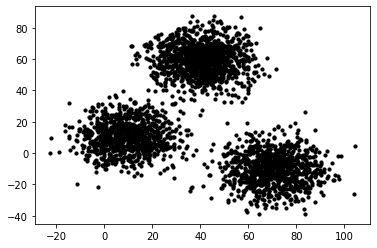

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]
C_x =  [44 66 28]
C_y =  [95 89 21]
Initial Centroids (random centroid) : 
[[44. 95.]
 [66. 89.]
 [28. 21.]]
(3, 2)


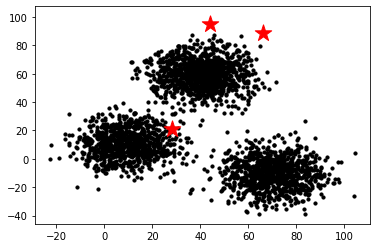

C = 
 [[44. 95.]
 [66. 89.]
 [28. 21.]]
C_old = 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
len(X) =  3000
clusters =  [0. 0. 0. ... 0. 0. 0.]
Error before loop [104.69479452 110.80162454  35.        ]
Error in loop [29.04983  29.571812 16.671793]
Error in loop [5.917121 5.662632 9.349691]
Error in loop [3.0297205 1.0410198 1.0940428]
Error in loop [3.0802405 1.5698444 0.5180989]
Error in loop [4.9042006 1.3662412 1.1576805]
Error in loop [9.277265  2.102805  2.1496415]
Error in loop [19.361467   2.4246607  8.135959 ]
Error in loop [16.660158   2.6865053 16.551924 ]
Error in loop [1.7843636  0.63587004 1.8581115 ]
Error in loop [0.03402718 0.02599239 0.        ]
Final Centroid  [[  9.478045  10.686052]
 [ 40.683628  59.715893]
 [ 69.92419  -10.119641]]


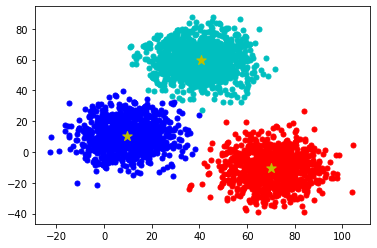

In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (8,6)
# Importing the dataset

data = pd.read_csv('/home/diwakar/Downloads/IITK ML Data/KMeansData.csv')
print("input data and shape")
print(data.shape)
print(data.head())


# getting the values and plotting
f1 = data["V1"].values
f2 = data["V2"].values

plt.scatter(f1, f2, c="black", s=10)
plt.show()

X = np.array(list(zip(f1, f2)))

print(X)

# Euclidean Distance Calculation
def eu_dist(a, b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

# Number of clusters
k = 3
# X coordinate of random centroid
C_x = np.random.randint(0, np.max(X), size=k)
print("C_x = ", C_x)
# Y coordinate of random centroid
C_y = np.random.randint(0, np.max(X), size=k)
print("C_y = ", C_y)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids (random centroid) : ")
print(C)
print(C.shape)

plt.scatter(f1, f2, s=10, c="k")
plt.scatter(C_x, C_y, marker="*", s=300, c="r")
plt.show()

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
print("C = \n", C)
print("C_old = \n", C_old)
print("len(X) = ", len(X))

# Cluster Labels (0, 1, 2)
clusters = np.zeros(len(X))

print("clusters = ", clusters)
# Error function - Distamce between two centroids(new and old)
error = eu_dist(C,C_old)
print("Error before loop", error)
# Loop will run till the error becomes zero
while error.all():   # error! = 0
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = eu_dist(X[i], C)
        cluster = np.argmin(distances)  # cluster 2
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for s in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == s]
        C[s] = np.mean(points, axis=0)
    error = eu_dist(C, C_old)
    print("Error in loop", error)

colors = ['b', 'c', 'r']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([ X[j] for j in range(len(X)) if clusters[j]==i])
    ax.scatter(points[:, 0], points[:, 1], s=25, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker="*", s=100, c='y')

print("Final Centroid ", C)
plt.show()

In [4]:
# Unsupervised Machine Learning K-Means Clustering Algorithm
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
# Importing the dataset
filename = '/home/diwakar/Downloads/IITK ML Data/KMeansData.csv'
data = pd.read_csv(filename)
print("Kmeans of sklearn")
# Number of clusters
kmeans = KMeans(n_clusters=3)


# getting the values and plotting
f1 = data["V1"].values
f2 = data["V2"].values

X = np.array(list(zip(f1, f2)))
# fitting the input data
kmeans = kmeans.fit(X) # calculation of centroids
# Getting the cluster labels
labels = kmeans.predict(X)
print("labels : ", labels)
print(list(zip(X, labels)))

# Centroid values
centroids = kmeans.cluster_centers_
print("Best place for new shop\n", centroids)

Kmeans of sklearn
labels :  [2 2 2 ... 0 0 0]


[(array([ 2.072345, -3.241693]), 2), (array([17.93671, 15.78481]), 2), (array([1.083576, 7.319176]), 2), (array([11.12067, 14.40678]), 2), (array([23.71155 ,  2.557729]), 2), (array([24.16993, 32.02478]), 2), (array([21.66578 ,  4.892855]), 2), (array([ 4.693684, 12.34217 ]), 2), (array([19.21191 , -1.121366]), 2), (array([ 4.230391, -4.441536]), 2), (array([ 9.12713, 23.60572]), 2), (array([ 0.4075031, 15.29705  ]), 2), (array([7.314846, 3.309312]), 2), (array([ -3.438403, -12.02527 ]), 2), (array([17.63935 , -3.212345]), 2), (array([ 4.415292, 22.81555 ]), 2), (array([11.94122 ,  8.122487]), 2), (array([0.7258532, 1.806819 ]), 2), (array([ 8.185273, 28.1326  ]), 2), (array([-5.773587,  1.0248  ]), 2), (array([18.76943, 24.16946]), 2), (array([ 7.752016, -3.334991]), 2), (array([10.61132, 28.44378]), 2), (array([ 2.02165 , -4.687122]), 2), (array([ 5.145525, 11.186   ]), 2), (array([ 6.24331, 19.47716]), 2), (array([-11.70671 ,   8.073185]), 2), (array([ 7.255978, 14.63704 ]), 2), (ar